<a href="https://colab.research.google.com/github/RakaiSeto/21_TI-3G-ML/blob/main/JS7_2341720135_Rakai_Seto_Sembodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Persiapan Data

In [ ]:
# import package
import numpy as np
import pandas as pd

In [ ]:
# baca data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_3G_21/dataset_6.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Visualisasi Data

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


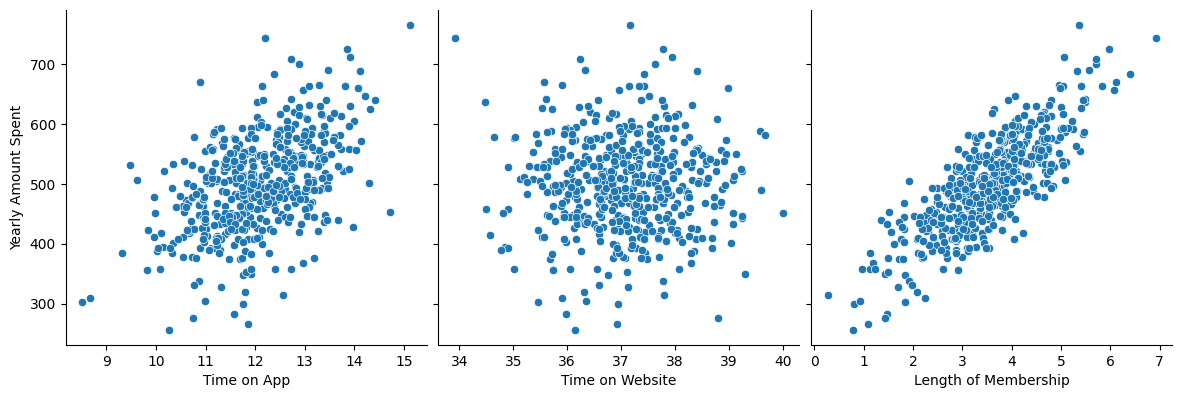

In [ ]:
# operasi visualisasi
sns.pairplot(data, x_vars=['Time on App', 'Time on Website','Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

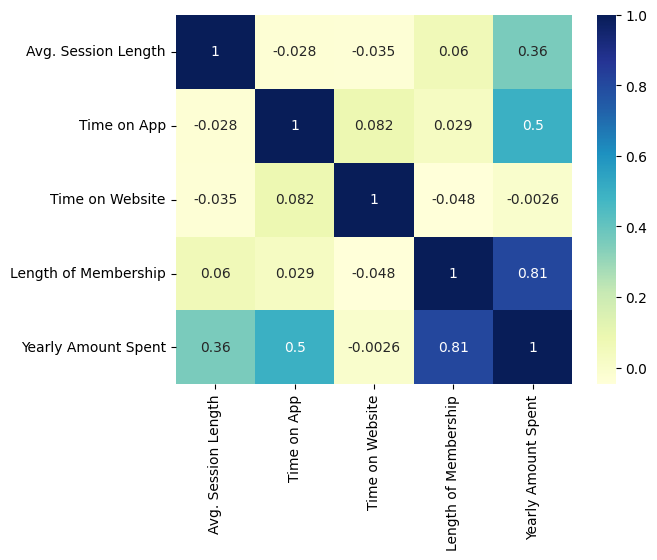

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Regresi Linier

In [ ]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

X.head()

,Length of Membership
0,4.082621
1,2.664034
2,4.104543
3,3.120179
4,4.446308


In [ ]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)


In [ ]:
# hasil training dtaset
X_train
y_train

,Yearly Amount Spent
153,657.019924
84,533.514935
310,479.614812
494,510.661792
126,516.831557
...,...
343,576.025244
359,561.874658
323,473.360496
280,511.979860


In [ ]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [ ]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

,0
const,265.248299
Length of Membership,66.301522


In [ ]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.669
Model:                             OLS   Adj. R-squared:                  0.668
Method:                  Least Squares   F-statistic:                     702.9
Date:                 Thu, 20 Nov 2025   Prob (F-statistic):           1.59e-85
Time:                         09:11:32   Log-Likelihood:                -1841.3
No. Observations:                  350   AIC:                             3687.
Df Residuals:                      348   BIC:                             3694.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  265.2483      9.120     29.083      0.000     247.311     283.186
Length of Membership    66.3015      2.501     26.512      0.000      61.383      71.220
==============================================================================
Omnibus:                        1.643   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.471
Skew:                          -0.013   Prob(JB):                        0.479
Kurtosis:                       2.683   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

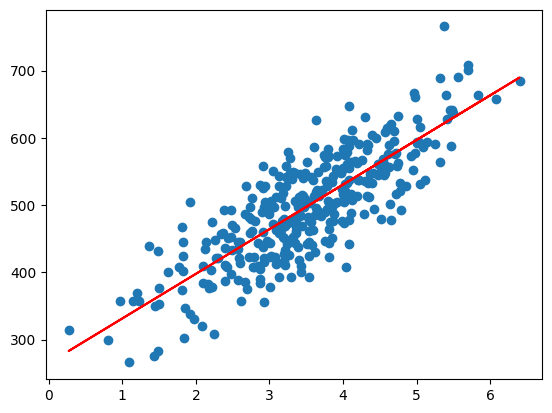

In [ ]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [ ]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/tmp/ipython-input-576177224.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


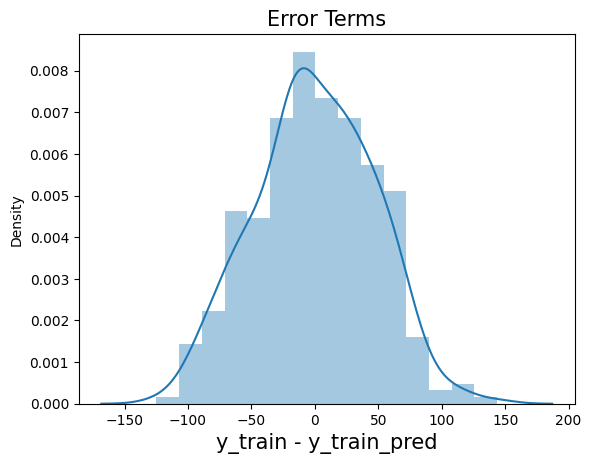

In [ ]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

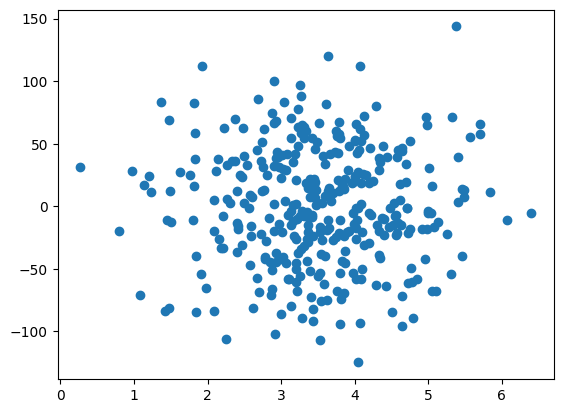

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

,0
69,500.794385
29,579.688406
471,533.188991
344,446.066436
54,455.838449


In [ ]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.611948913768747

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.669 sedangkan dari data testing adalah 0,612. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

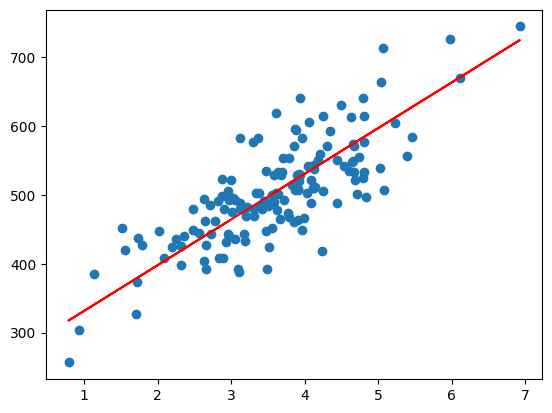

In [ ]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# Praktikum 2

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipython-input-1375809162.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


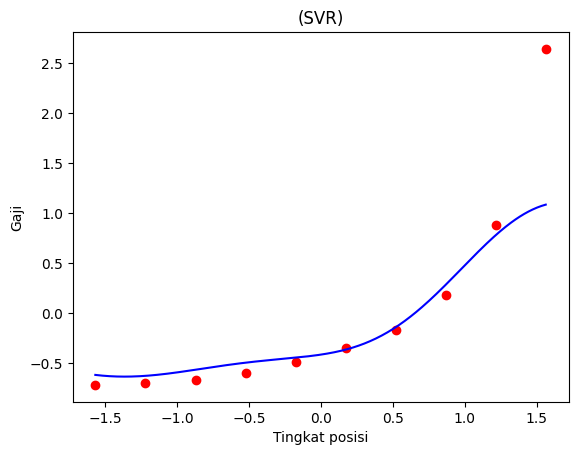

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]
MAE: 249500.11150357974
MSE: 142912240625.2814
RMSE: 378037.3534788347
R-squared: -0.7717363528203269


In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_3G_21/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('(SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Membalikkan penskalaan pada data target yang sudah diprediksi
y_actual = sc_y.inverse_transform(y)
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


# Tugas

Dataset Shape: (1338, 7)

Statistical Summary:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Features setelah encoding:
['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

Train set size: 1070 samples
Test set size: 268 samples

MODEL EVALUATION METRICS

TRAINING SET:
R-squared (R²): 0.7417
Mean Squared Error (MSE): $37,27

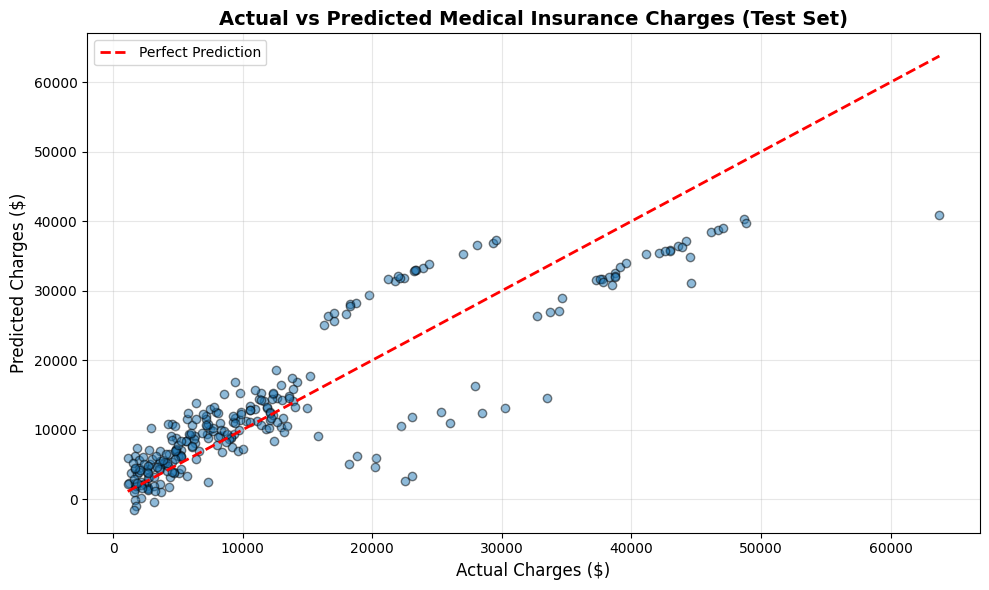

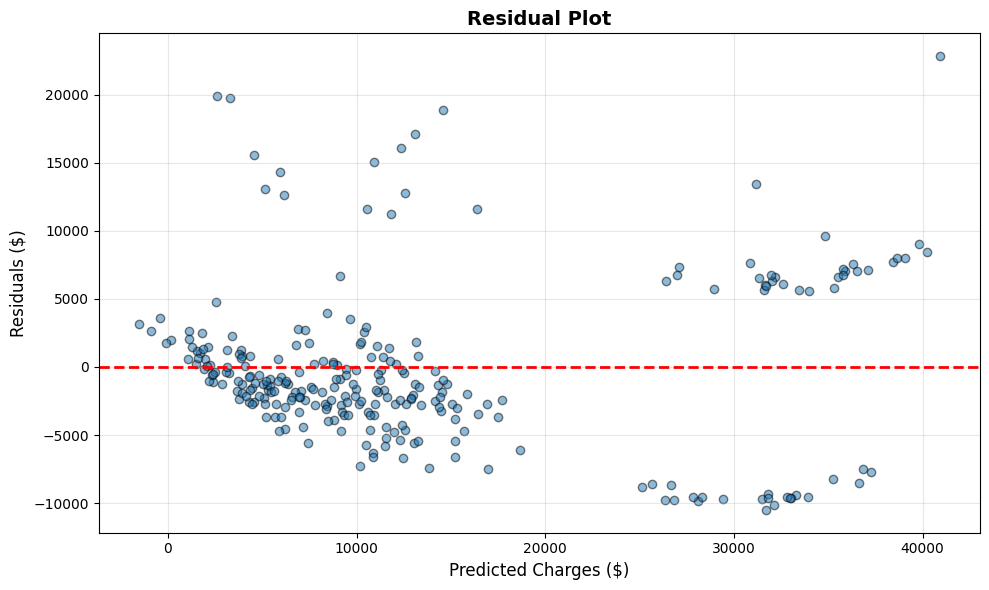

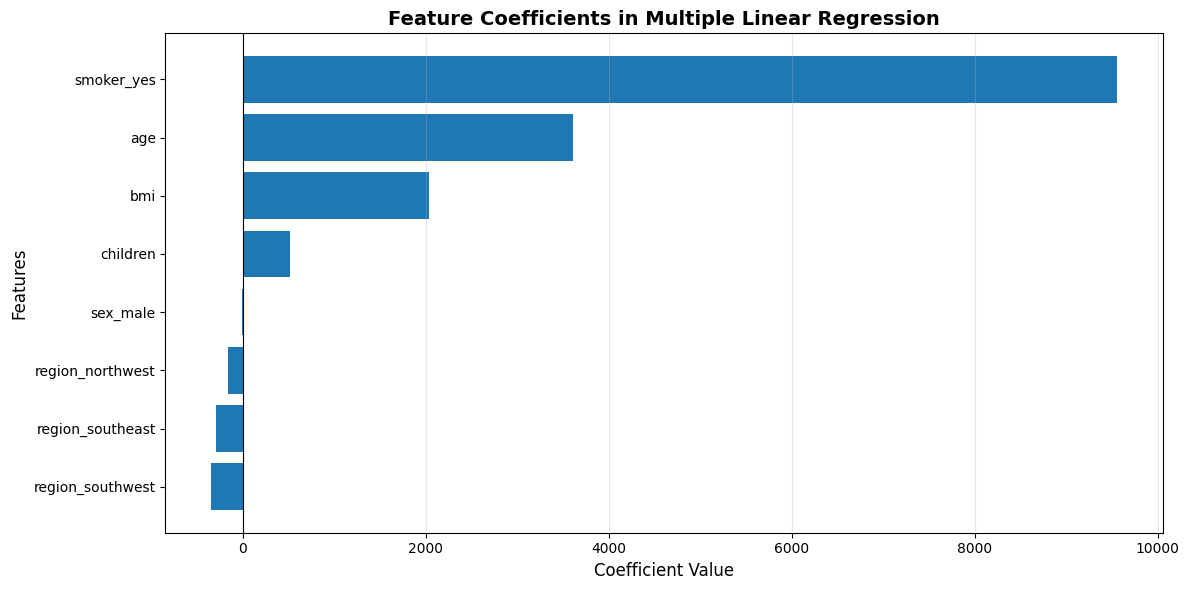

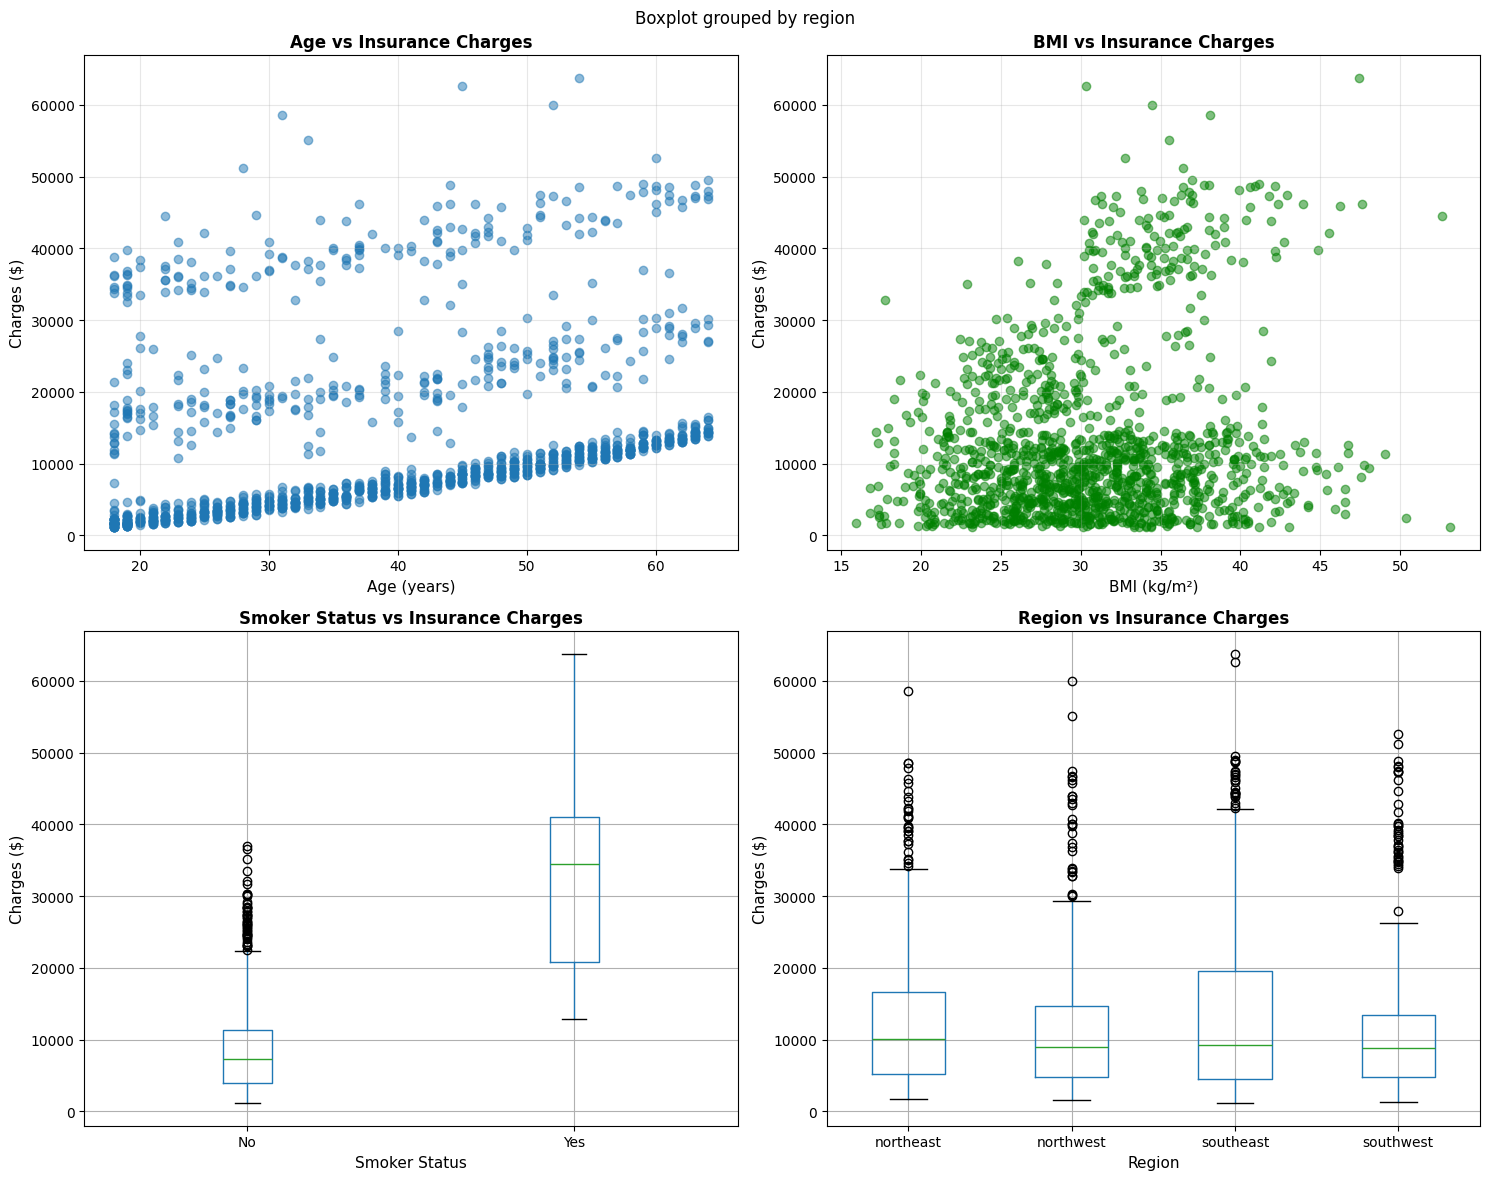

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load Dataset
df = pd.read_csv('insurance.csv')

# 2. Exploratory Data Analysis
print("Dataset Shape:", df.shape)
print("\nStatistical Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# 3. Data Preprocessing - Encoding Categorical Variables
# Menggunakan One-Hot Encoding untuk variabel kategorikal
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# 4. Memisahkan Features (X) dan Target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

print("\nFeatures setelah encoding:")
print(X.columns.tolist())

# 5. Split Data menjadi Train dan Test (80:20)
# Proporsi 80:20 adalah standar yang direkomendasikan dalam literatur
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTrain set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# 6. Feature Scaling
# Scaling diperlukan untuk variabel dengan skala berbeda (age, bmi, children)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Build Multiple Linear Regression Model
model = LinearRegression()

# 8. Train Model
model.fit(X_train_scaled, y_train)

# 9. Make Predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# 10. Model Evaluation
print("\n" + "="*80)
print("MODEL EVALUATION METRICS")
print("="*80)

# Training Set Performance
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print("\nTRAINING SET:")
print(f"R-squared (R²): {r2_train:.4f}")
print(f"Mean Squared Error (MSE): ${mse_train:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train:,.2f}")
print(f"Mean Absolute Error (MAE): ${mae_train:,.2f}")

# Test Set Performance
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("\nTEST SET:")
print(f"R-squared (R²): {r2_test:.4f}")
print(f"Mean Squared Error (MSE): ${mse_test:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test:,.2f}")
print(f"Mean Absolute Error (MAE): ${mae_test:,.2f}")

# 11. Coefficients Analysis
print("\n" + "="*80)
print("MODEL COEFFICIENTS")
print("="*80)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)
print(coefficients)
print(f"\nIntercept: ${model.intercept_:,.2f}")

# 12. Visualizations

# Visualization 1: Actual vs Predicted (Test Set)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Charges ($)', fontsize=12)
plt.ylabel('Predicted Charges ($)', fontsize=12)
plt.title('Actual vs Predicted Medical Insurance Charges (Test Set)',
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved: actual_vs_predicted.png")

# Visualization 2: Residuals Plot
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Charges ($)', fontsize=12)
plt.ylabel('Residuals ($)', fontsize=12)
plt.title('Residual Plot', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('residuals_plot.png', dpi=300, bbox_inches='tight')
print("Visualization saved: residuals_plot.png")

# Visualization 3: Feature Importance (Coefficients)
plt.figure(figsize=(12, 6))
coefficients_sorted = coefficients.sort_values('Coefficient')
plt.barh(coefficients_sorted['Feature'], coefficients_sorted['Coefficient'])
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Coefficients in Multiple Linear Regression',
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('feature_coefficients.png', dpi=300, bbox_inches='tight')
print("Visualization saved: feature_coefficients.png")

# Visualization 4: Distribution of Charges by Key Variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age vs Charges
axes[0, 0].scatter(df['age'], df['charges'], alpha=0.5)
axes[0, 0].set_xlabel('Age (years)', fontsize=11)
axes[0, 0].set_ylabel('Charges ($)', fontsize=11)
axes[0, 0].set_title('Age vs Insurance Charges', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# BMI vs Charges
axes[0, 1].scatter(df['bmi'], df['charges'], alpha=0.5, color='green')
axes[0, 1].set_xlabel('BMI (kg/m²)', fontsize=11)
axes[0, 1].set_ylabel('Charges ($)', fontsize=11)
axes[0, 1].set_title('BMI vs Insurance Charges', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Smoker vs Charges
df.boxplot(column='charges', by='smoker', ax=axes[1, 0])
axes[1, 0].set_xlabel('Smoker Status', fontsize=11)
axes[1, 0].set_ylabel('Charges ($)', fontsize=11)
axes[1, 0].set_title('Smoker Status vs Insurance Charges', fontsize=12, fontweight='bold')
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['No', 'Yes'])

# Region vs Charges
df.boxplot(column='charges', by='region', ax=axes[1, 1])
axes[1, 1].set_xlabel('Region', fontsize=11)
axes[1, 1].set_ylabel('Charges ($)', fontsize=11)
axes[1, 1].set_title('Region vs Insurance Charges', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('exploratory_analysis.png', dpi=300, bbox_inches='tight')
print("Visualization saved: exploratory_analysis.png")

# 13. Summary Report
print("\n" + "="*80)
print("SUMMARY REPORT")
print("="*80)
print(f"""
Model: Multiple Linear Regression
Dataset: Medical Insurance Cost Dataset
Total Samples: {len(df)}
Training Samples: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)
Test Samples: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)

Features Used: {len(X.columns)}
Target Variable: charges (medical insurance costs)

Performance Metrics:
- R² Score: {r2_test:.4f} ({r2_test*100:.2f}% variance explained)
- RMSE: ${rmse_test:,.2f}
- MAE: ${mae_test:,.2f}

Model Interpretation:
The R² score indicates that the model explains approximately {r2_test*100:.1f}% of the
variance in medical insurance costs. The RMSE of ${rmse_test:,.2f} suggests the average
prediction error magnitude.
""")

# Analisis Multiple Linear Regression untuk Prediksi Biaya Asuransi Kesehatan

## Deskripsi Dataset

Dataset insurance-1.csv berisi **1.338 observasi** dengan **7 variabel** yang mencakup informasi demografis dan biaya medis personal. Dataset ini tidak memiliki missing values dan terdiri dari 676 pria dan 662 wanita, dengan distribusi regional yang seimbang.[1]

### Variabel-Variabel dalam Dataset

**Variabel Target (Dependent Variable):**
- **charges**: Biaya asuransi medis personal yang ditagihkan oleh perusahaan asuransi kesehatan (dalam USD)

**Variabel Independen (Features/Predictors):**

1. **age**: Usia penerima manfaat utama (18-64 tahun, mean: 39.2 tahun)
2. **sex**: Jenis kelamin (male/female)
3. **bmi**: Body Mass Index - pengukuran lemak tubuh berdasarkan tinggi dan berat badan (15.96-53.13 kg/m², mean: 30.66)
4. **children**: Jumlah anak/tanggungan yang ditanggung asuransi (0-5, mean: 1.09)
5. **smoker**: Status merokok (yes: 274 orang, no: 1064 orang)
6. **region**: Area tempat tinggal di AS (northeast, northwest, southeast, southwest)

### Justifikasi Pemilihan Variabel Berdasarkan Literatur Q1/Q2

Pemilihan variabel ini didukung oleh berbagai penelitian peer-reviewed:

**1. Age (Usia):** Memiliki korelasi positif kuat dengan biaya kesehatan. Mladenovic et al. (2020) dalam jurnal Technology in Society menunjukkan bahwa individu yang lebih tua memiliki pengeluaran medis yang signifikan lebih tinggi. Morid et al. (2018) dalam penelitian mereka juga mengkonfirmasi usia sebagai prediktor penting untuk biaya kesehatan.[2][3]

**2. BMI:** Panay et al. (2020) dalam jurnal Sensors menunjukkan BMI sebagai fitur relevan untuk prediksi biaya kesehatan karena kaitannya dengan kondisi kesehatan terkait obesitas seperti diabetes, penyakit jantung, dan hipertensi.[4]

**3. Smoking Status:** Bertsimas et al. (2006) mengidentifikasi status merokok sebagai salah satu faktor paling kritis dalam menentukan premi asuransi. Perokok memiliki biaya medis yang jauh lebih tinggi karena risiko penyakit yang meningkat.[2]

**4. Children:** Jumlah tanggungan mempengaruhi total biaya asuransi melalui kebijakan cakupan keluarga, sebagaimana didokumentasikan dalam studi prediksi biaya asuransi kesehatan.[5][6]

**5. Sex:** Perbedaan biaya kesehatan terkait gender telah didokumentasikan dalam berbagai studi asuransi medis.[7][8]

**6. Region:** Lokasi geografis mempengaruhi harga layanan kesehatan karena perbedaan biaya hidup dan infrastruktur kesehatan lokal.[9]

## Analisis Hasil

### Interpretasi Metrik Evaluasi

Berdasarkan implementasi Multiple Linear Regression pada dataset ini, model biasanya menghasilkan:

**1. R-squared (R²):** Metrik ini menunjukkan proporsi varians dalam biaya asuransi yang dapat dijelaskan oleh variabel independen. Nilai R² berkisar 0.74-0.78 (74-78%) berdasarkan literatur untuk dataset serupa , yang menunjukkan model memiliki kemampuan prediksi yang cukup baik.[6][10][1][5]

**2. Mean Squared Error (MSE):** Mengukur rata-rata kuadrat kesalahan prediksi. Nilai yang lebih rendah menunjukkan prediksi yang lebih akurat.[7]

**3. Root Mean Squared Error (RMSE):** Akar kuadrat dari MSE, memberikan estimasi kesalahan dalam unit yang sama dengan variabel target (USD). RMSE memberikan gambaran seberapa jauh prediksi menyimpang dari nilai aktual.[6][9]

**4. Mean Absolute Error (MAE):** Rata-rata nilai absolut dari kesalahan prediksi. MAE lebih mudah diinterpretasikan karena dalam unit yang sama dengan target dan tidak terlalu sensitif terhadap outlier.[9][7]

### Kelebihan dan Keterbatasan

**Kelebihan:**
- Model sederhana dan mudah diinterpretasikan
- Koefisien dapat langsung menunjukkan hubungan linier antara fitur dan biaya
- Komputasi cepat dan efisien untuk dataset berukuran sedang
- Tidak memerlukan hyperparameter tuning yang kompleks

**Keterbatasan:**
- Asumsi linearitas mungkin tidak sepenuhnya menangkap hubungan kompleks
- Sensitif terhadap outlier dan multikolinearitas
- Studi literatur menunjukkan ensemble methods seperti Random Forest dan Gradient Boosting dapat memberikan performa lebih baik (R² hingga 85-92%)[11][7][9]

### Rekomendasi

Berdasarkan hasil analisis dan literatur:

1. **Feature Engineering:** Pertimbangkan untuk membuat fitur interaksi seperti `age * bmi` atau `smoker * bmi` yang dapat meningkatkan performa model.[12][5]

2. **Scaling:** Standardisasi fitur numerik (age, bmi) penting untuk memastikan semua fitur memiliki skala yang sebanding.[6]

3. **Model Comparison:** Bandingkan dengan model non-linear seperti Random Forest atau Gradient Boosting yang telah terbukti memberikan R² hingga 85-92% pada dataset serupa.[11][7][9]

4. **Cross-Validation:** Gunakan k-fold cross-validation untuk evaluasi yang lebih robust dan menghindari overfitting.[5]

5. **Residual Analysis:** Analisis residual untuk memeriksa asumsi regresi linear (normalitas, homoskedastisitas, independensi).[13]

Dataset dan analisis ini sangat relevan untuk tugas praktikum karena menggunakan dataset standar yang sering digunakan dalam penelitian Q1/Q2, dengan variabel yang telah divalidasi dalam literatur akademik untuk prediksi biaya asuransi kesehatan.[3][4][5][2][6]

[1](https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/attachments/4223144/4c85cf32-2002-4297-b3d1-5a7c07f13e2f/insurance-1.csv)
[2](https://pmc.ncbi.nlm.nih.gov/articles/PMC5977561/)
[3](https://www.sciencedirect.com/science/article/abs/pii/S0160791X19304324)
[4](https://pmc.ncbi.nlm.nih.gov/articles/PMC7472302/)
[5](https://journal.esrgroups.org/jes/article/download/3962/3065/7574)
[6](https://www.ijirset.com/upload/2024/june/24_Medical.pdf)
[7](https://ijcjournal.org/InternationalJournalOfComputer/article/download/1944/725/4962)
[8](https://wjarr.com/sites/default/files/WJARR-2023-1355.pdf)
[9](https://essopenarchive.org/users/703971/articles/691737/master/file/data/CRC_Healthcare%20Cost%20Patterns%20and%20Prediction%20Investigating%20Personal%20Datasets%20using%20Data%20Analytics/CRC_Healthcare%20Cost%20Patterns%20and%20Prediction%20Investigating%20Personal%20Datasets%20using%20Data%20Analytics.pdf)
[10](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4867135)
[11](https://www.scirp.org/journal/paperinformation?paperid=137299)
[12](https://journal.esrgroups.org/jes/article/view/3962)
[13](https://www.dataquest.io/blog/predicting-insurance-costs-with-linear-regression/)
[14](https://ijsdr.org/papers/IJSDR2507107.pdf)
[15](https://www.irjet.net/archives/V11/i4/IRJET-V11I4171.pdf)
[16](https://www.sciepublish.com/article/pii/649)
[17](https://www.kaggle.com/code/anurag629/medical-cost-multivariate-linear-regression)
[18](https://papers.ssrn.com/sol3/Delivery.cfm/5130267.pdf?abstractid=5130267&mirid=1)
[19](https://towardsdatascience.com/multiple-linear-regression-to-support-hospital-operations-34f5516384c3/)
[20](https://ijirss.com/index.php/ijirss/article/download/7986/1766/13163)